In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpld3

In [84]:
#data = np.load("../data/roomba/20151027_095617.npz")
#data = np.load("../data/roomba/20151028_062002.npz")
#data = np.load("../data/roomba/20151028_214758.npz")
#data = np.load("../data/roomba/20151029_134115.npz")   # half is recording and other is not recording
#data = np.load("../data/roomba/20151029_164722.npz")   # 1min static recording
#data = np.load("../data/roomba/20151029_172252.npz")   # (forward -> back) x 2 -> static (800Hz)
data = np.load("../data/roomba/20151029_175151.npz")   # (forward -> back) x 2 -> static  (200Hz)
static_mask = (data['time']>=30.0)
dynamic_mask = \
    ((5<data['time']) & (data['time']<9)) | \
    ((11<data['time']) & (data['time']<17)) |\
    ((19<data['time']) & (data['time']<22)) |\
    ((29<data['time']) & (data['time']<28))

# Data Check

Time: 0.000000 - 78.094997
Data points:  15620

Update Frequency
Average:  200.000027
Min:  199.840127897
Max:  200.160128103
 > 700:  0
 > 300:  0


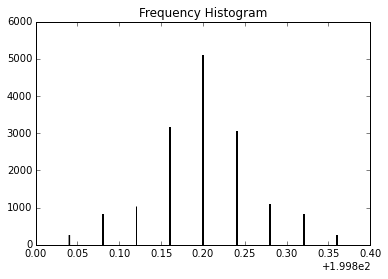

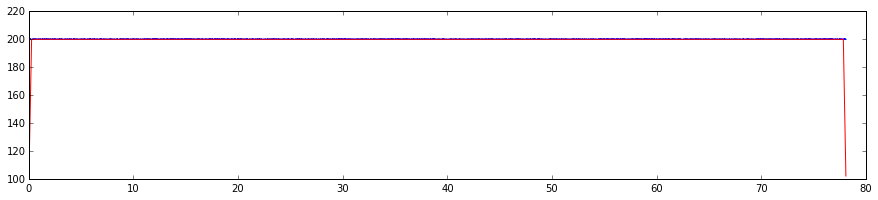

In [85]:
print("Time: %f - %f"%(data['time'][0], data['time'][-1]))
print("Data points: ", len(data['time']))
dt = data['time'][1:] - data['time'][:-1]
print()
print("Update Frequency")
uf = 1./dt
print("Average: ", np.average(uf))
print("Min: ", uf.min())
print("Max: ", uf.max())
print(" > 700: ", np.sum(uf>700))
print(" > 300: ", np.sum(uf>300))

plt.hist(uf, bins=500)
plt.title("Frequency Histogram")
plt.show()

plt.figure(figsize=(15,3))
plt.plot(data['time'][1:], uf)
plt.plot(data['time'][1:], np.convolve(uf, np.ones(100), 'same')/100, 'r')
plt.show()

# Time - Data

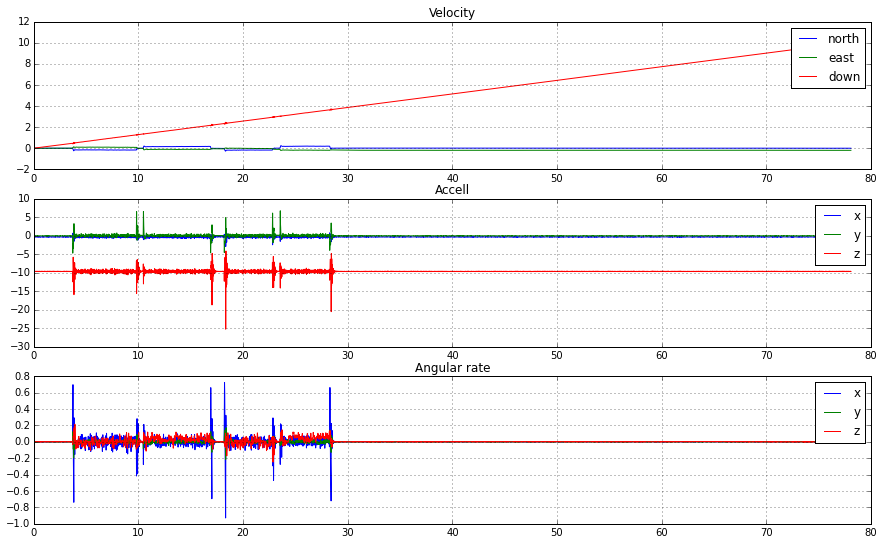

In [86]:
plt.figure(figsize=(15,9))

plt.subplot(3,1,1)
plt.plot(data['time'], data['vel'])
plt.legend(['north', 'east', 'down'])
plt.title("Velocity")
plt.grid()

plt.subplot(3,1,2)
plt.plot(data['time'], data['acl'])
plt.legend(['x', 'y', 'z'])
plt.title("Accell")
plt.grid()

plt.subplot(3,1,3)
plt.plot(data['time'], data['ang'])
plt.legend(['x', 'y', 'z'])
plt.title("Angular rate")
plt.grid()

plt.show()

## Velocity

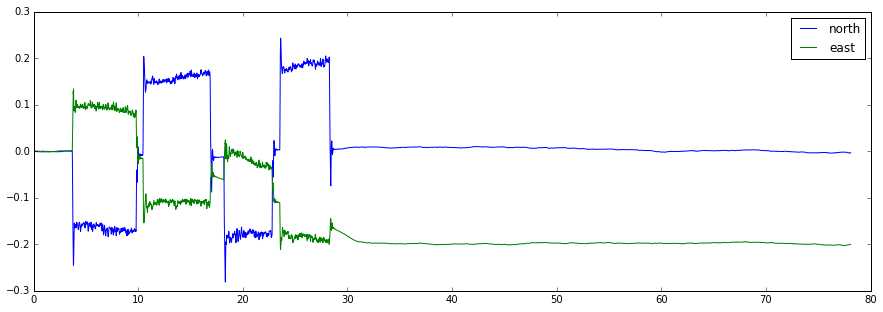

In [98]:
plt.figure(figsize=(15,5))
plt.plot(data['time'], data['vel'][:,:2], '-')
plt.legend(['north', 'east'])
plt.show()

## Acceleration

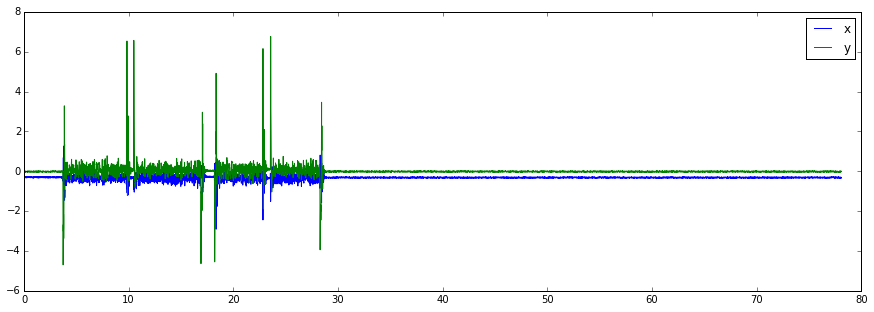

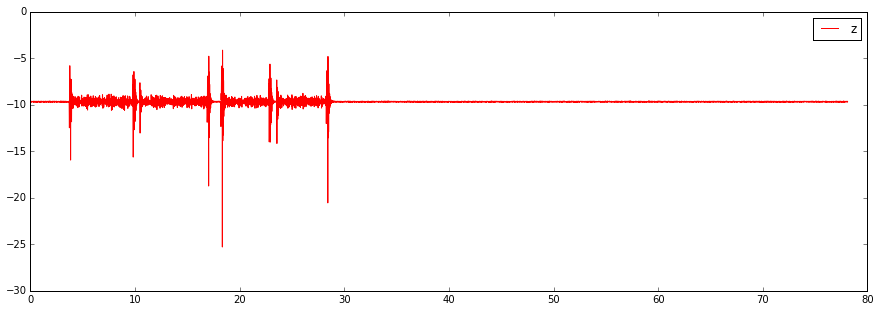

In [99]:
plt.figure(figsize=(15,5))
plt.plot(data['time'], data['acl'][:,:2])
plt.legend(['x', 'y'])
plt.show()
plt.figure(figsize=(15,5))
plt.plot(data['time'], data['acl'][:,2], 'r')
plt.legend(['z'])
plt.show()

## Angular rate 

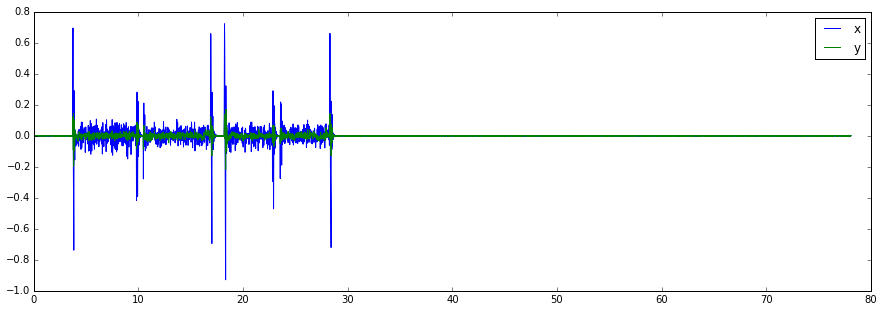

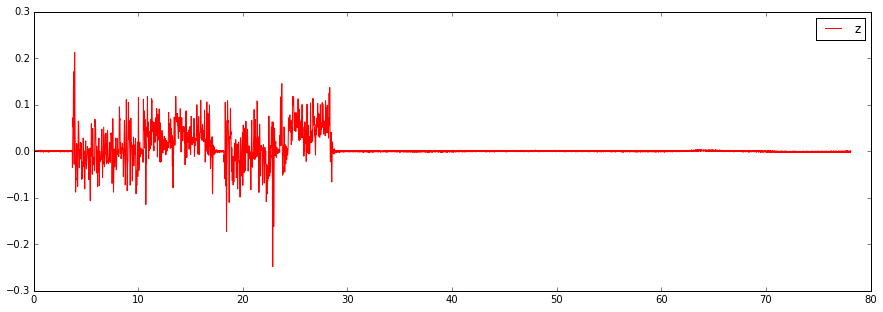

In [100]:
plt.figure(figsize=(15,5))
plt.plot(data['time'], data['ang'][:,:2])
plt.legend(['x', 'y'])
plt.show()
plt.figure(figsize=(15,5))
plt.plot(data['time'], data['ang'][:,2], 'r')
plt.legend(['z'])
plt.show()

# Position

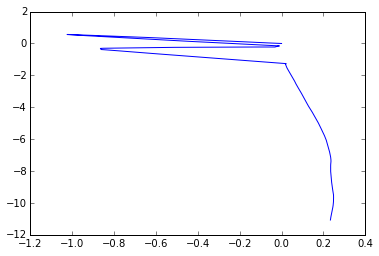

In [101]:
plt.plot(data['pos'][:, 0], data['pos'][:,1], '-')
plt.show()

# Sensor data

In [102]:
def plot_sensor_hist(data):
    plt.figure(figsize=(15, 4))
    label = ['X', 'Y', 'Z']
    for i in range(3):
        plt.subplot(1,3,1+i)
        x = data[:, i]
        plt.hist(x, bins=bin_n)
        plt.title("%s (av: %f, std: %f)" % (label[i], np.average(x), np.std(x) ))

    plt.show()

In [103]:
bin_n = int(np.ceil(1 + np.log2(np.sum(static_mask))))
print("data num: %d" % np.sum(static_mask))
print("bin num: %d" % bin_n)

data num: 9619
bin num: 15


## Static

Acceleration


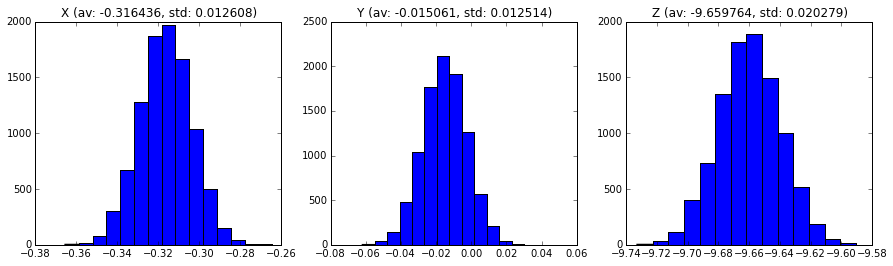

Angular rate


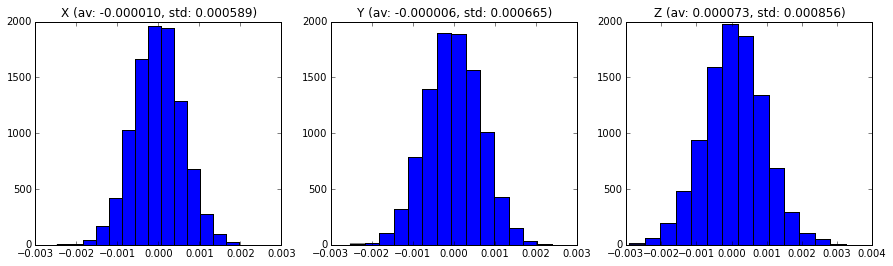

In [104]:
print("Acceleration")
plot_sensor_hist(data['acl'][static_mask])
print("Angular rate")
plot_sensor_hist(data['ang'][static_mask])

## Dynamic (linear uniform)

Acceleration


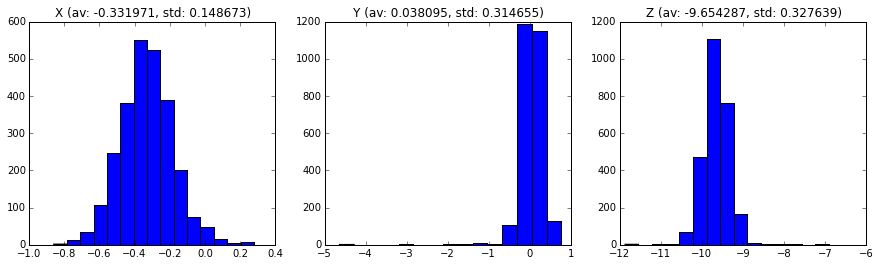

Angular rate


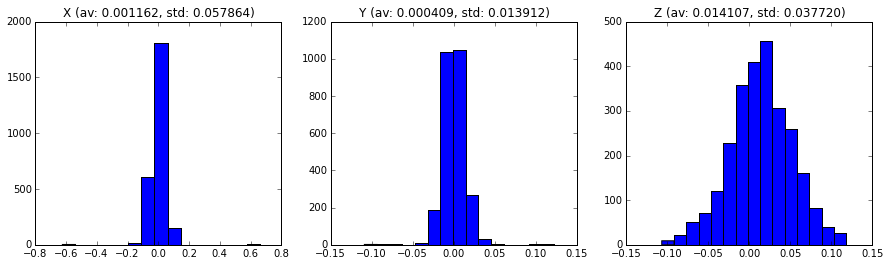

In [106]:
print("Acceleration")
plot_sensor_hist(data['acl'][dynamic_mask])
print("Angular rate")
plot_sensor_hist(data['ang'][dynamic_mask])